In [48]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [5]:
train = pd.read_csv('archive/train.csv')
test = pd.read_csv('archive/test.csv')

In [10]:
print('Dimensoes do dataset de treino: ',train.shape)
print('Dimensoes do dataset de teste: ',test.shape)

Dimensoes do dataset de treino:  (20279, 17)
Dimensoes do dataset de teste:  (13519, 16)


In [11]:
data = train.copy()

In [6]:
train.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [7]:
test.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes
0,GF_2372,842,663,24,2016-11-12 13:49:12.000,2016-11-16 10:49:12.000,203,1334,4358,1912,10,1899,2016-11-16 12:49:12.000,2016-11-13 04:00:00.000,0,NaN
1,GF_13040,407,534,754,2016-11-12 13:49:22.000,2016-11-17 14:49:22.000,4785,5940,2582,1912,10,1488,2016-11-12 14:49:22.000,2016-11-03 01:00:00.000,0,NaN
2,GF_5754,631,433,6012,2016-11-12 13:49:23.000,2016-11-16 13:49:23.000,1812,5027,3427,1912,10,1913,2016-11-15 11:49:23.000,2016-11-01 05:00:00.000,1,NaN
3,GF_1417,992,433,6358,2016-11-12 13:49:24.000,2016-11-16 11:49:24.000,2002,6883,5537,1912,10,1734,2016-11-14 12:49:24.000,2016-11-04 04:00:00.000,0,NaN
4,GF_23204,43,534,6123,2016-11-12 13:49:40.000,2016-11-18 11:49:40.000,1512,6883,610,1912,9,150,2016-11-14 10:49:40.000,2016-11-02 01:00:00.000,1,NaN


## Data Transform

### Verificando valores not a number

In [27]:
data.isna().sum()

gift_id                  0
gift_type                0
gift_category            0
gift_cluster             0
instock_date             0
stock_update_date        0
lsg_1                    0
lsg_2                    0
lsg_3                    0
lsg_4                    0
lsg_5                    0
lsg_6                    0
uk_date1                 0
uk_date2                 0
is_discounted            0
volumes              12956
price                    0
dtype: int64

In [33]:
data['volumes'].notna().sum() 


7323

<AxesSubplot:>

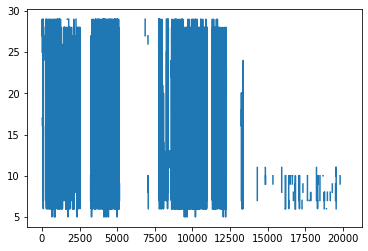

In [37]:
data['volumes'].plot()

In [38]:
data['volumes'].describe()

count    7323.000000
mean       15.515363
std         7.579669
min         5.000000
25%         9.000000
50%        13.000000
75%        24.000000
max        29.000000
Name: volumes, dtype: float64

In [39]:
data = data.dropna(axis=1)

In [42]:
data.isna().sum()

gift_id              0
gift_type            0
gift_category        0
gift_cluster         0
instock_date         0
stock_update_date    0
lsg_1                0
lsg_2                0
lsg_3                0
lsg_4                0
lsg_5                0
lsg_6                0
uk_date1             0
uk_date2             0
is_discounted        0
price                0
dtype: int64

## Analise descritiva

<AxesSubplot:>

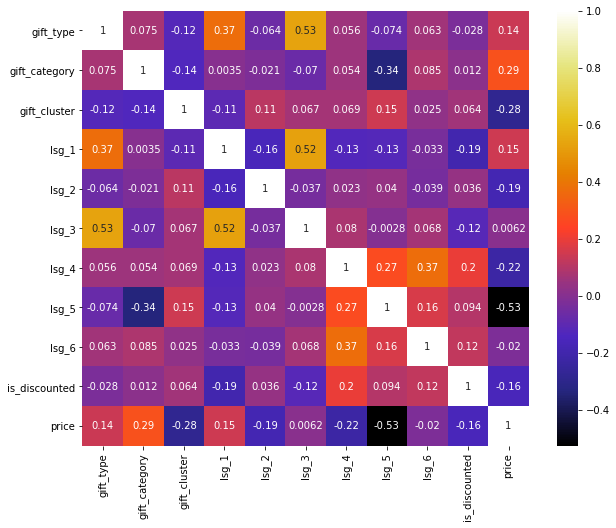

In [49]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='CMRmap')

## Data Visualization